In [284]:
import tensorflow as tf
import numpy as np
import time
from IPython.display import Image

## BRAINTELS LABS
ARTIFICIAL INTELLIGENCE , IMAGE PROCESSING & EMBEDDED SYSTEMS

#### TENSORBOARD
    Tensorboard es una herramienta para la visualización y monitero de variables utilizados en el aprendizaje automatico (machine learning). tensorboard viene instalado junto con *Tensorflow*.
    tensorboard permite poder determinar parametros denominados summary protocol buffer de una forma sencilla y asi poder realizar un seguimiento sobre los indices de rendimiento , imagenes , histogramas de los parametros  sinapticos y capas de convolución con el fin de tener un mejor control sobre el entrenamiento de un modelo de aprendizaje automatico .

##### Braintels Labs
Aqui presentamos un grafo que consiste de **2 capas de convolución conv2D para realizar un filtrado sobre una imagen de entrada **.


Los nombres kernel1 y kernel2 representan los filtros convolucionales2D . 

**y1 : salida de la convolución2D entre el kernel1 y la imagen de entrada.** 

**y2 : salida de la convolución 2D entre el kernel2 y la salida y1 .**

*El objetivo es poder visualizar como los filtros modifican las imagenes y con eso extraer caracteristicas que una arquitectura neuronal (CNN) utilizara para aprender y posteriormente reconocer en etapas de entrenamiento.*

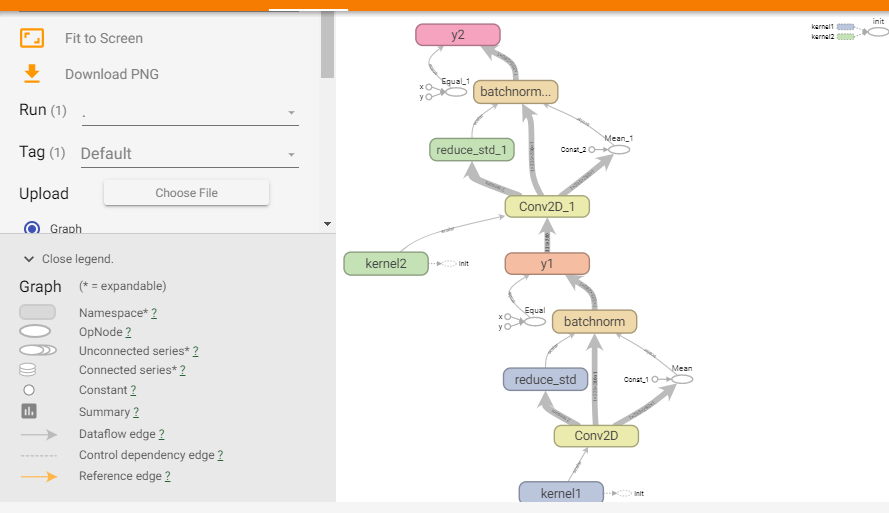

In [285]:
#----------------------------- GRAFO COMPUTACIONAL ------------------
Image("img1.png")

In [286]:
#--------------------deshabilitar modo eager
tf.compat.v1.disable_eager_execution()

In [287]:
#------------limpiar y reiniciar el grafo por default
tf.compat.v1.reset_default_graph()

In [288]:
cont=0
#------------------------- función a crear para realiar la convolución 2D ---------
def conv2d_brain(X, scope=None,kernel_shape=None,strides=1,Name=None,activation="relu",flag=0):
    
    """
    X: entrada de la convolución 2D
    scope=Nombre del variable_scope que estara como prefijo de cada kernel scope/
    kernel_shape=lista que indica la forma del kernel a crear
    strides= determina el paso en sentido horizontal y verticial de la convolución 2D
    Name=nombre del kernel de convolución 2D
    activation= nombre de la función de activación luego de realizar la convolución 2D 
    flag: parametro para realizar un batch_normalization (flag=1) o no realizarlo (flag=0)

    
    """
    global cont
    cont=cont+1
    if Name is None or isinstance(scope,str)==False or kernel_shape is None:
        print("ERROR")
        return None
    #variables creadas dentro tendran como prefijo de nombre : scope/
    with tf.compat.v1.variable_scope(name_or_scope=scope,reuse=tf.compat.v1.AUTO_REUSE):
        # Crear variable mediante tf.compat.v1.get_variable
        kernel = tf.compat.v1.get_variable(name=Name, shape=kernel_shape,
                                           initializer=tf.random_normal_initializer())
        print("kernel :",kernel.name,'shape',kernel.shape)
  
    #aplicar convolución 2d sobre la entrada X
    conv = tf.nn.conv2d(input=X,filters= kernel,strides=strides, padding='SAME')
    #aplicar batch normalización
    if flag==1:
        conv=tf.nn.batch_normalization(conv,
                                       mean=tf.reduce_mean(conv),
                                       variance=tf.math.reduce_std(conv),
                                       variance_epsilon=0.00000001,
                                       scale=1.0,
                                       offset=0.0
                                      )
    #-------------------- uso de la función case para realizar una operación por selección-

    return tf.case([(tf.math.equal(activation,"sigmoid"),lambda:tf.nn.sigmoid(conv))],
            default=lambda:tf.nn.relu(conv),name="y{}".format(cont))
   
    


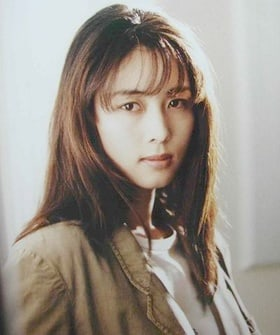

In [295]:
#BRAINTELS LABS 
Image("izumi.jpg")

In [290]:
#---------------------- ENTRADA DE PRUEBA IMAGEN RGB------------- BRAINTELS
X=tf.ones(shape=[1,10,10,3],name="x")
from cv2 import imread ,cvtColor,COLOR_BGR2RGB
X=cvtColor(imread("izumi.jpg"),COLOR_BGR2RGB)
#convertir de BGR a RGB
X=np.expand_dims(X,axis=0)
X=tf.convert_to_tensor(X,dtype=tf.float32)
#---tf.compat.v1.summary.image(name="Imagen Entrada",X)
s1=tf.compat.v1.summary.image("Imagen Entrada",X)
ks=[3,3,3,1]
#--------------------- y1 CONV2D sobre la entrada X
y1=conv2d_brain(X,scope="kernel1",kernel_shape=ks,strides=1, Name="w",flag=1)
s2=tf.compat.v1.summary.image("Imagen Y1",y1)


INFO:tensorflow:Summary name Imagen Entrada is illegal; using Imagen_Entrada instead.
kernel : kernel1/w:0 shape (3, 3, 3, 1)
INFO:tensorflow:Summary name Imagen Y1 is illegal; using Imagen_Y1 instead.


**Caracteristicas extraidas por la convolución2D con el filtro kernel1**

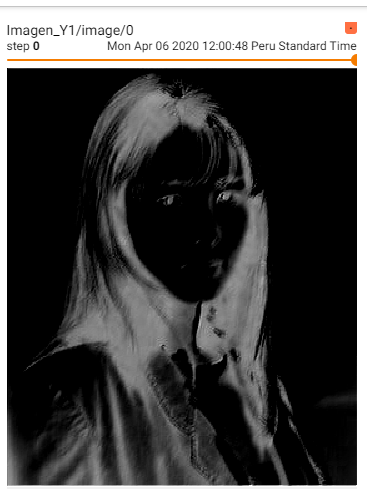

In [296]:
#----------IMAGEN FILTRADA Y1 
Image("imgy1.png")

In [292]:
#----------------------- CONV2D sobre la salida y1
ks=[3,3,1,1]
y2=conv2d_brain(y1,scope="kernel2",kernel_shape=ks,strides=1,Name="w",flag=1)
#summary.image ("ImagenY2",y2)
s3=tf.compat.v1.summary.image("Imagen Y2",y2)
#tf.compat.v1.summary.merge_all()
merge=tf.compat.v1.summary.merge_all()

kernel : kernel2/w:0 shape (3, 3, 1, 1)
INFO:tensorflow:Summary name Imagen Y2 is illegal; using Imagen_Y2 instead.


**Caracteristicas extraidas por la convolución2D con el filtro kernel2**

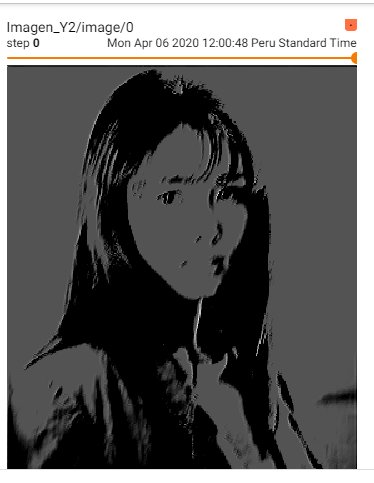

In [297]:
#----------IMAGEN FILTRADA Y2
Image("imgy2.png")


In [294]:
#Sesión para ejecutar el grafo computacional
with tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph()) as sesion:
    #iniciializar variables
    sesion.run(tf.compat.v1.global_variables_initializer())
    #evaluar y2
    val=sesion.run(y2)
    writer = tf.compat.v1.summary.FileWriter("logdir_graph", sesion.graph)
    #ejecutar el merge
    summary=sesion.run(merge)
    #agregar el summary  al objeto writer
    writer.add_summary(summary)
writer.close()
#-------- http://localhost:6006/ -----
    

### BRAINTELS LABS
*ARTIFICIAL INTELLIGENCE , IMAGE PROCESSING & EMBEDDED SYSTEMS*

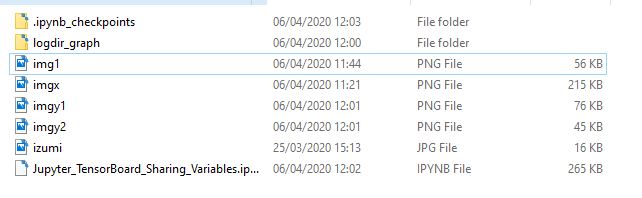

In [298]:
Image("board.png")

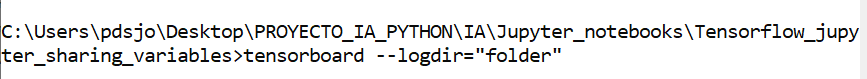

In [299]:
#COLOCAR tensorboard --logdir="logdir_graph"
Image("dir.png")

tipear la siguiente URL en tu ordenador para visualizar tensorboard
http://localhost:6006/ 